In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
import locale
locale.setlocale( locale.LC_ALL, '' )

'pt_BR.UTF-8'

In [2]:
dados = pd.read_csv('Viagens.csv',sep=';',error_bad_lines=False,encoding='ISO-8859-1',decimal=",")

#Ministério da Educação
MEC_VIAGENS = dados.loc[dados['Nome do órgão superior']=='Ministério da Educação']['Valor passagens']

#Ministério da Defesa
MD_VIAGENS = dados.loc[dados['Nome do órgão superior']=='Ministério da Defesa']['Valor passagens']

#Ministério da Saúde
MS_VIAGENS = dados.loc[dados['Nome do órgão superior']=='Ministério da Saúde']['Valor passagens']

#Ministério da Cidadania
MC_VIAGENS = dados.loc[dados['Nome do órgão superior']=='Ministério da Cidadania']['Valor passagens']

#Ministério da Infraestrutura
MI_VIAGENS = dados.loc[dados['Nome do órgão superior']=='Ministério da Infraestrutura']['Valor passagens']

#Ministério da Economia
ME_VIAGENS = dados.loc[dados['Nome do órgão superior']=='Ministério da Economia']['Valor passagens']

#Ministério das Relações Exteriores
MRE_VIAGENS = dados.loc[dados['Nome do órgão superior']=='Ministério das Relações Exteriores']['Valor passagens']


In [3]:
headers = [
    'Ministério da Educação',
    'Ministério da Defesa',
    'Ministério da Saúde',
    'Ministério da Cidadania',
    'Ministério da Infraestrutura',
    'Ministério da Economia',
    'Ministério das Relações Exteriores',
]
valores = [
    MEC_VIAGENS.sum(),
    MD_VIAGENS.sum(),
    MS_VIAGENS.sum(),
    MC_VIAGENS.sum(),
    MI_VIAGENS.sum(),
    ME_VIAGENS.sum(),
    MRE_VIAGENS.sum(),
]

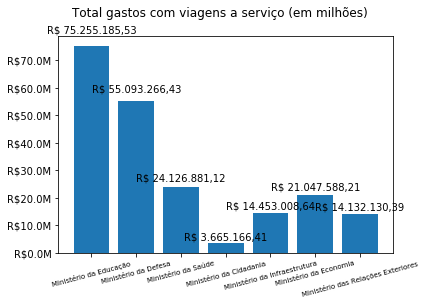

In [4]:
def formatarMoeda(x, pos):
    return 'R$%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(formatarMoeda)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
test = plt.bar(headers, valores)
plt.suptitle('Total gastos com viagens a serviço (em milhões)')
plt.xticks(headers, rotation=15, fontsize=7)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%s' % locale.currency( float(height), grouping=True ),
        ha='center', va='bottom')

autolabel(test)

plt.show()